In [1]:
from sklearn.datasets import load_files
import numpy as np

reviews_train = load_files("../data/aclImdb/train/")
text_train, y_train = reviews_train.data, reviews_train.target
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

print("type of text_train: {}\n".format(type(text_train)))
print("length of text_train: {}\n".format(len(text_train)))
print("text_train[6]:\n{}\n".format(text_train[0]))
print("Sample per class (training): {}\n".format(np.bincount(y_train)))

type of text_train: <class 'list'>

length of text_train: 25000

text_train[6]:
b"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.  It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see.   Flawed but honest with a terrible honesty."

Sample per class (training): [12500 12500]



In [2]:
reviews_test = load_files("../data/aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

print("type of text_train: {}\n".format(type(text_test)))
print("length of text_train: {}\n".format(len(text_test)))
print("text_train[6]:\n{}\n".format(text_test[0]))
print("Sample per class (training): {}\n".format(np.bincount(y_test)))

type of text_train: <class 'list'>

length of text_train: 25000

text_train[6]:
b"Don't hate Heather Graham because she's beautiful, hate her because she's fun to watch in this movie. Like the hip clothing and funky surroundings, the actors in this flick work well together. Casey Affleck is hysterical and Heather Graham literally lights up the screen. The minor characters - Goran Visnjic {sigh} and Patricia Velazquez are as TALENTED as they are gorgeous. Congratulations Miramax & Director Lisa Krueger!"

Sample per class (training): [12500 12500]



In [3]:
from sklearn.feature_extraction.text import CountVectorizer
bards_words =["The fool doth think he is wise,",
                "but the wise man knows himself to be a fool"]
vect = CountVectorizer(min_df=2)
vect.fit(bards_words)
print("Vocabulary size: {}".format(len(vect.vocabulary_)))
print("Vocabulary size: {}".format(vect.vocabulary_))
bag_of_words = vect.transform(bards_words)
print("bag_of_words: {}".format(bag_of_words))
print("Dense representation of bag_of_words:\n{}".format(bag_of_words.toarray()))

Vocabulary size: 3
Vocabulary size: {'the': 1, 'fool': 0, 'wise': 2}
bag_of_words:   (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
Dense representation of bag_of_words:
[[1 1 1]
 [1 1 1]]


In [5]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train:\n{}".format(repr(X_train)))
feature_names = vect.get_feature_names()
print("Number of feature: {}".format(len(feature_names)))
print("First 20 feature:\n{}".format(feature_names[:20]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 2000th feature: \n{}".format(feature_names[:2000]))

X_train:
<25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>
Number of feature: 27271
First 20 feature:
['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '103']
Features 20010 to 20030:
['repentance', 'repercussions', 'repertoire', 'repetition', 'repetitions', 'repetitious', 'repetitive', 'rephrase', 'replace', 'replaced', 'replacement', 'replaces', 'replacing', 'replay', 'replayable', 'replayed', 'replaying', 'replays', 'replete', 'replica']
Every 2000th feature: 
['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '103', '104', '105', '107', '108', '10s', '10th', '11', '110', '112', '116', '117', '11th', '12', '120', '12th', '13', '135', '13th', '14', '140', '14th', '15', '150', '15th', '16', '160', '1600', '16mm', '16s', '16th', '17', '17th', '18', '180', '1800', '18

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
scores = cross_val_score(LogisticRegression(n_jobs=-1), X_train, y_train, cv=5, n_jobs=-1)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.88


In [7]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(n_jobs=-1), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameter: ", grid.best_params_)

/home/tinhtn/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tinhtn/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Best cross-validation score: 0.89
Best parameter:  {'C': 0.1}


In [8]:
X_test = vect.transform(text_test)
print("Test score: {:.2f}".format(grid.score(X_test, y_test)))

Test score: 0.88


In [9]:
# Stop word
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("Number of stop words: {}".format(len(ENGLISH_STOP_WORDS)))
print("Every 10th stopword: \n{}".format(list(ENGLISH_STOP_WORDS)))

Number of stop words: 318
Every 10th stopword: 
['wherein', 'them', 'nothing', 'meanwhile', 'very', 'she', 'up', 'will', 'has', 'wherever', 'everything', 'same', 'take', 'whoever', 'perhaps', 'hers', 'eleven', 'are', 'through', 'serious', 'hence', 'he', 'over', 'also', 'becoming', 'made', 'until', 'nobody', 'herself', 'thereby', 'some', 'this', 'all', 'namely', 'third', 'to', 'any', 'even', 'hundred', 'between', 'fifty', 'ie', 'whence', 'it', 'onto', 'becomes', 'nowhere', 'thin', 'here', 'if', 'otherwise', 'whereby', 'which', 'so', 'you', 'me', 'could', 'further', 'not', 'but', 'cry', 'co', 'elsewhere', 'off', 'thru', 'con', 'though', 'via', 'twelve', 'had', 'side', 'hereupon', 'whatever', 'afterwards', 'now', 'former', 'whether', 'what', 'anyhow', 'go', 'per', 'therein', 'hereafter', 'seems', 'beyond', 'however', 'only', 'that', 'there', 'an', 'be', 'detail', 'am', 'nor', 'well', 'have', 'themselves', 'they', 'us', 'due', 'another', 'without', 'around', 'ourselves', 'yours', 'these', 

In [10]:
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train)
X_train = vect.transform(text_train)
print("X_train with stop words:\n {}".format(repr(X_train)))
grid = GridSearchCV(LogisticRegression(n_jobs=-1), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameter: ", grid.best_params_)

X_train with stop words:
 <25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


/home/tinhtn/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tinhtn/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Best cross-validation score: 0.88
Best parameter:  {'C': 0.1}


In [11]:
# Recaling the Data with tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression(n_jobs=-1))
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)
grid.fit(text_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

/home/tinhtn/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tinhtn/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Best cross-validation score: 0.89


In [12]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
X_train = vectorizer.transform(text_train)
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
feature_names = np.array(vectorizer.get_feature_names())

print("Feature with lowest tfidf:\n {}".format(feature_names[sorted_by_tfidf[:20]]))
print("Feature with highest tfidf:\n {}".format(feature_names[sorted_by_tfidf[-20:]]))

Feature with lowest tfidf:
 ['suplexes' 'gauche' 'hypocrites' 'oncoming' 'songwriting' 'galadriel'
 'emerald' 'mclaughlin' 'sylvain' 'oversee' 'cataclysmic' 'pressuring'
 'uphold' 'thieving' 'inconsiderate' 'ware' 'denim' 'reverting' 'booed'
 'spacious']
Feature with highest tfidf:
 ['gadget' 'sucks' 'zatoichi' 'demons' 'lennon' 'bye' 'dev' 'weller'
 'sasquatch' 'botched' 'xica' 'darkman' 'woo' 'casper' 'doodlebops'
 'smallville' 'wei' 'scanners' 'steve' 'pokemon']


In [13]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("Feature with lowest idf:\n{}".format(feature_names[sorted_by_idf[:100]]))

Feature with lowest idf:
['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


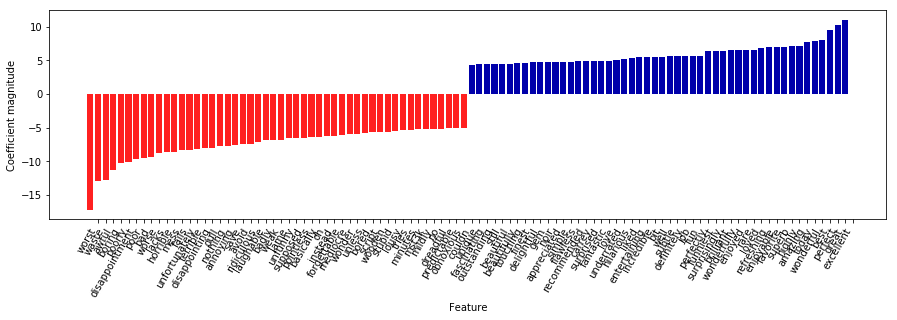

In [15]:
import mglearn
mglearn.tools.visualize_coefficients(grid.best_estimator_.named_steps["logisticregression"].coef_,
                                     feature_names, n_top_features=50)

In [16]:
# Bag of word with more than one word (n-Grams)
vect = CountVectorizer(ngram_range=(1, 3))
vect.fit(bards_words)
print("Vocabulary size: {}".format(len(vect.vocabulary_)))
print("Vocabulary size: {}".format(vect.vocabulary_))
bag_of_words = vect.transform(bards_words)
print("Dense representation of bag_of_words:\n{}".format(bag_of_words.toarray()))

Vocabulary size: 39
Vocabulary size: {'the': 25, 'fool': 8, 'doth': 5, 'think': 30, 'he': 11, 'is': 17, 'wise': 36, 'the fool': 26, 'fool doth': 9, 'doth think': 6, 'think he': 31, 'he is': 12, 'is wise': 18, 'the fool doth': 27, 'fool doth think': 10, 'doth think he': 7, 'think he is': 32, 'he is wise': 13, 'but': 2, 'man': 22, 'knows': 19, 'himself': 14, 'to': 33, 'be': 0, 'but the': 3, 'the wise': 28, 'wise man': 37, 'man knows': 23, 'knows himself': 20, 'himself to': 15, 'to be': 34, 'be fool': 1, 'but the wise': 4, 'the wise man': 29, 'wise man knows': 38, 'man knows himself': 24, 'knows himself to': 21, 'himself to be': 16, 'to be fool': 35}
Dense representation of bag_of_words:
[[0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0
  1 0 0]
 [1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1
  1 1 1]]


In [17]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression(n_jobs=-1))
param_grid = {"logisticregression__C":[0.001, 0.01, 0.1, 1, 10, 100],
              "tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}
grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=4)
grid.fit(text_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

/home/tinhtn/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tinhtn/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Best cross-validation score: 0.91
Best parameters:
{'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 3)}


In [18]:
print("Test-set score: {:.2f}".format(grid.score(text_test, y_test)))

Test-set score: 0.90


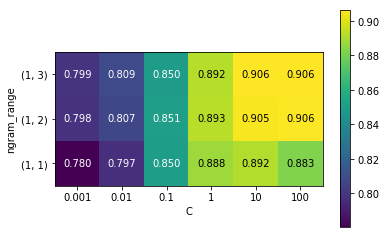

In [19]:
import matplotlib.pyplot as plt 
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T
# visualize heat map
heatmap = mglearn.tools.heatmap(scores, xlabel="C", ylabel="ngram_range",
                                cmap="viridis", fmt="%.3f",
                                xticklabels=param_grid['logisticregression__C'],
                                yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

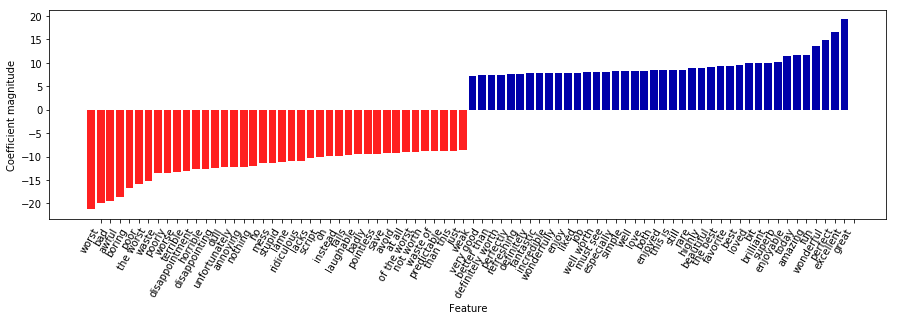

In [21]:
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=40)

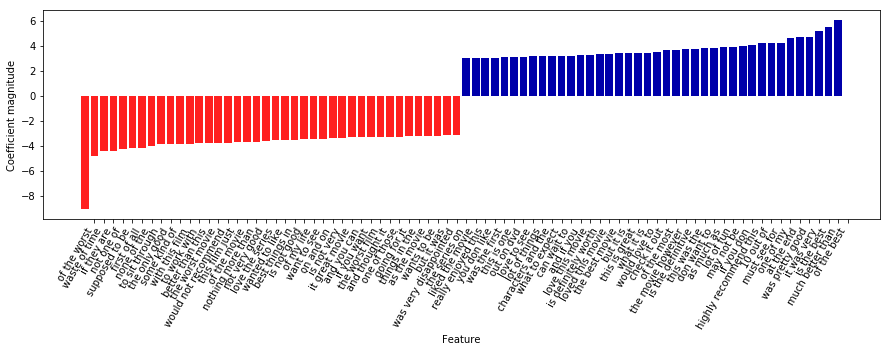

In [22]:
# find 3-gram feature
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3
mglearn.tools.visualize_coefficients(coef.ravel()[mask], feature_names[mask],
                                     n_top_features=40)

In [32]:
# Advanced Tokenization, Stemming, and Lemmatization
import spacy
import nltk

en_nlp = spacy.load('en')
stemmer = nltk.stem.PorterStemmer()
def compare_normalization(doc):
    doc_spacy = en_nlp(doc)
    print("Lemmatization")
    print([token.lemma_ for token in doc_spacy])
    print("Stemming")
    print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])

compare_normalization(u"Our meeting today was been than yesterday, "
                      "I'm scared of meeting the clients tomorrow.")

Lemmatization
['-PRON-', 'meeting', 'today', 'be', 'be', 'than', 'yesterday', ',', '-PRON-', 'be', 'scared', 'of', 'meet', 'the', 'client', 'tomorrow', '.']
Stemming
['our', 'meet', 'today', 'wa', 'been', 'than', 'yesterday', ',', 'i', 'am', 'scare', 'of', 'meet', 'the', 'client', 'tomorrow', '.']


In [53]:
import re
from spacy.tokens import Doc

regexp = re.compile('(?u)\\b\\w\\w+\\b')
en_nlp = spacy.load('en', disable=['parser', 'ner'])
old_tokenizer = en_nlp.tokenizer
en_nlp.tokenizer = lambda string: old_tokenizer.tokens_from_list(regexp.findall(string))

def custom_tokenizer(document):
    doc_spacy = en_nlp(document)
    return [token.lemma_ for token in doc_spacy]

lemma_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=5)

X_train_lemma = lemma_vect.fit_transform(text_train)
print("X_train_lemma.shape: {}".format(X_train_lemma.shape))

X_train_lemma.shape: (25000, 21571)


In [54]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train.shape: {}".format(X_train.shape))

X_train.shape: (25000, 27271)


In [60]:
from sklearn.model_selection import StratifiedShuffleSplit
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10]}
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.99, train_size=0.01, random_state=0)
grid = GridSearchCV(LogisticRegression(n_jobs=8), param_grid, cv=cv, n_jobs=8)
grid.fit(X_train, y_train)
print("Best score-validation score"
      "(standard CountVectorizer): {:.3f}".format(grid.best_score_))

/home/tinhtn/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tinhtn/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Best score-validation score(standard CountVectorizer): 0.721


In [59]:
grid.fit(X_train_lemma, y_train)
print("Best score-validation score"
      "(lemmatization): {:.3f}".format(grid.best_score_))

/home/tinhtn/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tinhtn/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Best score-validation score(lemmatization): 0.735


In [61]:
# Topic Modeling and Document Clustering
vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(text_train)
print(X.shape)

(25000, 10000)


In [75]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_topics=10, learning_method="batch", max_iter=25, random_state=0, n_jobs=-1)
document_topics = lda.fit_transform(X)
print(document_topics.shape)

/home/tinhtn/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


(25000, 10)


In [76]:
print("lda.components_.shape: {}".format(lda.components_.shape))
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)

lda.components_.shape: (10, 10000)
topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
between       war           funny         show          didn          
family        world         comedy        series        saw           
young         us            guy           episode       thought       
real          american      worst         tv            am            
performance   our           thing         episodes      watched       
both          documentary   re            shows         got           
director      history       stupid        season        10            
beautiful     years         actually      new           now           
work          new           laugh         years         book          
us            own           want          television    dvd           


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------    

In [77]:
lda100 = LatentDirichletAllocation(n_topics=100, learning_method="batch", max_iter=25, random_state=0, n_jobs=-1)
document_topics100 = lda100.fit_transform(X)
topics = np.array([7, 16, 24, 25, 28, 36, 37, 45, 51, 53, 54, 63, 89, 97])

sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=20)

/home/tinhtn/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


topic 7       topic 16      topic 24      topic 25      topic 28      
--------      --------      --------      --------      --------      
horror        pretty        years         gets          western       
atmosphere    horror        science       car           stewart       
creepy        boring        fiction       guy           west          
thriller      gore          age           goes          johnny        
genre         re            today         killed        gun           
dark          isn           world         down          town          
house         guy           past          around        james         
suspense      girl          space         house         westerns      
director      girls         future        going         john          
quite         flick         now           police        horse         
fans          nothing       star          woman         mann          
effective     looking       century       home          wayne         
moment

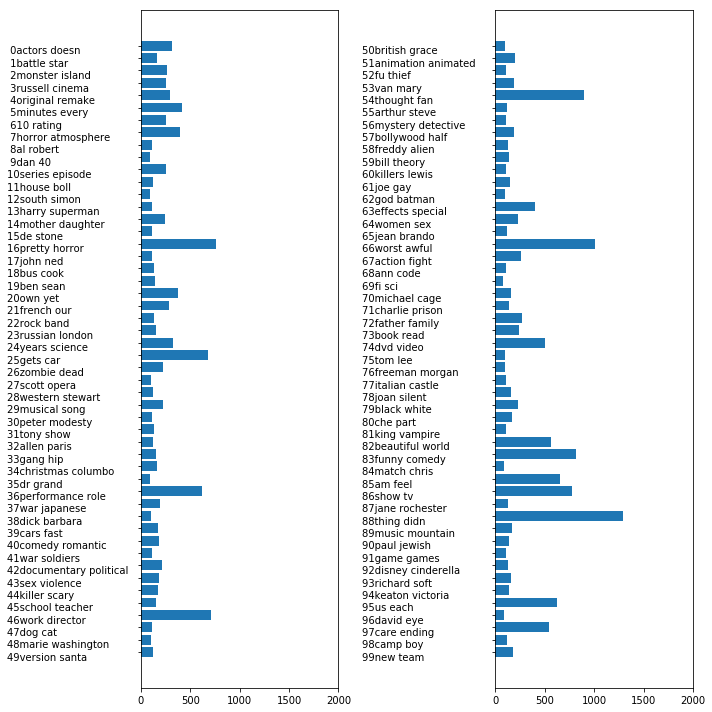

In [80]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2}".format(i) + " ".join(words)
                for i, words in enumerate(feature_names[sorting[:, :2]])]
for col in [0, 1]:
    start = col*50
    end = (col + 1)*50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()